# TP - Régression et Régularisation
Dans ce TP vous devrez implémenter la regression logistique (en partant du code de la régression linéaire) et vous l'appliquerez sur des données décrivant des voitures (`Auto2.csv`)

### D'abord, chargeons les données

Les données décrivent des voitures.
On a des variables comme le poids de la voiture, son accelération, etc...
et on cherche à prédire sa cylindrée, qui peut être 4 cylindres (classe 0) ou plus (classe 1)

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random

Pour charger les données depuis un fichier csv, on utilise un module python qui s'appelle `pandas`.

In [2]:
import pandas
autos = pandas.read_csv( "Auto2.csv")
autos.drop(labels=['name','origin'],axis=1,inplace=True)
autos = autos[autos.cylinders != 3]
autos = autos[autos.cylinders != 5]
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,29.0,4,85.0,52.0,2035,22.2,76
1,29.9,4,98.0,65.0,2380,20.7,81
2,23.0,4,140.0,78.0,2592,18.5,75
3,27.2,4,141.0,71.0,3190,24.8,79
4,28.0,4,151.0,90.0,2678,16.5,80


maintenant, on converti ces données en tableaux numpy:
* `X` sera le tableau de données à 5 variables
* la cylindrée sera stockée dans `y`

In [3]:
X = autos[['mpg','displacement','weight','acceleration','year']].values
y = (autos[['cylinders']].values.squeeze() >= 6).astype(int)

In [4]:
print('X=',X,'\ny=',y[:20])

X= [[  29.    85.  2035.    22.2   76. ]
 [  29.9   98.  2380.    20.7   81. ]
 [  23.   140.  2592.    18.5   75. ]
 ...
 [  28.   107.  2464.    15.5   76. ]
 [  20.5  231.  3425.    16.9   77. ]
 [  19.   120.  3270.    21.9   76. ]] 
y= [0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


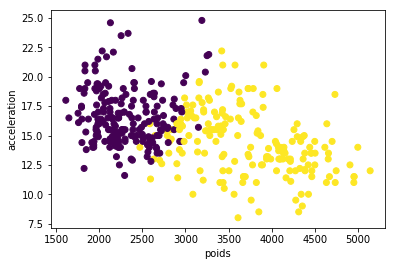

In [5]:
# Affichons les points de X, en utilisant seulement les 3ieme et 4ieme colonnes de X.
plt.scatter(X[:,2],X[:,3],c=y)
plt.xlabel('poids')
plt.ylabel('acceleration');

### Sujet du TP


Avant tout, on va mélanger les données avec la commande `X,y = shuffle(X,y)`. Cette commande provient du module python `scikit-learn`

#### Régression

* Lancez la fonction `descente_grad_stochatstique_reg_lineaire` (ci-dessous en annexe) avec les bons paramètres (que vous trouverez par essai-erreur).  Vous lirez le code pour comprendre parfaitement ce qu'elle fait. Remarquez que les données ne sont pas normalisées, et ont des valeurs relativement grandes. Donc il est probable que seul un très petit pas d'apprentissage convienne ici.
* Notre problème est un problème de classification, donc la régression linéaire n'est pas adaptée. Ce qu'on cherche à faire est plutot une régression logistique. Ecrivez la fonction `descente_grad_stochatstique_reg_logistique` en modifiant la fonction `descente_grad_stochatstique_reg_lineaire`, et lancez-la. Testez la regression logistique associée sur les données.
* Ecrivez une fonction  `erreur_empirique(X,y,theta)` qui calcule l'erreur quadratique empirique de la regression logistique sur l'ensemble des données `X,y`
* Ecrivez une fonction  `log_vraissemblance_empirique(X,y,theta)` qui calcule le log de la vraissemblance empirique de la regression logistique sur l'ensemble des données `X,y`

#### Régularisation

* Ajoutez une régularisation l1 à la descente de gradient. Pour rappel, la norme l1 est la somme des valeurs absolues des theta_j. Donc dans la formule du gradient, il faut ajouter lambda*signe(theta_j) pour chaque coordonnée j (ce qui correspond à la dérivée de la norme l1).
* Pour différentes valeurs du paramètre lambda, relancez la régression logistique. Affichez en fonction de lambda le taux d'erreur en classification, et le nombre de theta_j non-nuls (en réalité, les theta_j ne sont jamais exactement égaux à zero. Donc on choisira un petit epsilon, et on comptera le nombre de theta_j donc la valeur absolue est plus grande que epsilon).



### Annexes

Fonctions qui seront utiles pour faire le TP

In [8]:
# Pour faire la descente de gradient, on a besoin de la fonction g(z)=1/(1+exp(-z))
# mais cette fonction est "numeriquement instable", car l'exponentiel peut générer des
# valeurs hors des limites des floats.
# Donc on utilise la version suivante de g(), équivalente mais stable

def g(z):
    "Numerically stable sigmoid function."
    if z >= 0:
        ez = np.exp(-z)
        return 1 / (1 + ez)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        ez = np.exp(z)
        return ez / (1 + ez)

In [9]:
# Voici un algorithme de base de descente de gradient pour une régression lineaire appliqué aux données.
# NB: pour simplifier, le modèle prédit n'a pas de constante theta0 comme vu en cours.

def descente_grad_stochatstique_reg_lineaire(X,y,alpha):

    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = np.dot( theta , xi )

        theta -= alpha*xi*(h-yi)

    return theta

In [17]:
def descente_grad_stochatstique_reg_logistique(X,y,alpha):

    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = 1/(1+np.exp(-xi))

        theta -= alpha*xi*(h-yi)

    return theta

In [18]:
alpha1=0.001
print(descente_grad_stochatstique_reg_lineaire(X,y,alpha1))
print(descente_grad_stochatstique_reg_logistique(X,y,alpha1))

[nan nan nan nan nan]
[  -14.71129348   -53.669      -1130.674         -8.25935645
   -38.088     ]


/Users/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


In [30]:
def erreur_empirique(X,y,theta):
    
    for t in range (len(y)):
        somme=np.sum((g(X[:t])-y[t])**2)
    
    return somme

In [31]:
print(erreur_empirique(X,y,descente_grad_stochatstique_reg_logistique(X,y,alpha1)))

/Users/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()